https://medium.com/analytics-vidhya/predicting-stock-prices-using-facebooks-prophet-model-b1716c733ea6#:~:text=Prophet%20is%20a%20procedure%20for,daily%20seasonality%2C%20plus%20holiday%20effects.&text=with%2C%20g(t)%20representing,linear%20model%20for%20trend%20forecasting.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("df1.csv", parse_dates=['Date'])
# df.head()

In [2]:
df = df[["Date","Close"]] 
# Rename the features: These names are required for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
# df.head()

In [3]:
from datetime import datetime
cutoff = datetime(2020,1,1)
df_train = df.loc[df.ds < cutoff,].copy()
df_test = df.drop(df_train.index).copy()
df_train

,ds,y
270,2019-12-31,3230.78
271,2019-12-30,3221.29
272,2019-12-27,3240.02
273,2019-12-26,3239.91
274,2019-12-24,3223.38
...,...,...
4524,2002-12-24,892.47
4525,2002-12-23,897.38
4526,2002-12-20,895.75
4527,2002-12-19,884.25


In [4]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality = True) 
fbp.fit(df_train)
# We need to specify the number of days in future
# We'll be predicting the full 2021 stock prices
fut = fbp.make_future_dataframe(periods=365) 
forecast = fbp.predict(fut)

In [5]:
fc_train = forecast.loc[forecast.ds < cutoff,].copy()
fc_test = forecast.drop(fc_train.index).copy()

In [6]:
import trading_calendars as tc
import pandas as pd
import pytz

xnys = tc.get_calendar('XNYS')
trading_days = [x for x in fc_test.ds if xnys.is_session(x)]

<ipython-input-6-ca852d8ba927>:6: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  trading_days = [x for x in fc_test.ds if xnys.is_session(x)]


In [7]:
for idx, row in fc_test.iterrows():
    if row.ds not in trading_days:
        fc_test = fc_test.drop(index=idx)

fc_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4260,2020-01-02,3127.717241,3019.995969,3167.130809,3127.717241,3127.717241,-31.834776,-31.834776,-31.834776,-33.802313,...,-1.457062,-1.457062,-1.457062,3.424598,3.424598,3.424598,0.0,0.0,0.0,3095.882465
4261,2020-01-03,3128.448849,3020.232469,3170.164888,3128.448849,3128.448849,-31.821888,-31.821888,-31.821888,-33.802313,...,-1.484910,-1.484910,-1.484910,3.465335,3.465335,3.465335,0.0,0.0,0.0,3096.626962
4264,2020-01-06,3130.643673,3024.976100,3176.424810,3130.643673,3130.643673,-33.005104,-33.005104,-33.005104,-33.802313,...,-2.736322,-2.736322,-2.736322,3.533531,3.533531,3.533531,0.0,0.0,0.0,3097.638569
4265,2020-01-07,3131.375281,3026.163496,3171.080886,3131.375281,3131.375281,-31.072615,-31.072615,-31.072615,-33.802313,...,-0.769007,-0.769007,-0.769007,3.498704,3.498704,3.498704,0.0,0.0,0.0,3100.302666
4266,2020-01-08,3132.106889,3023.455414,3176.089813,3132.106889,3132.106889,-32.390001,-32.390001,-32.390001,-33.802313,...,-2.003277,-2.003277,-2.003277,3.415588,3.415588,3.415588,0.0,0.0,0.0,3099.716888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,2020-12-23,3388.169677,3146.845461,3550.693945,3199.436799,3578.843485,-31.457548,-31.457548,-31.457548,-33.802313,...,-2.003277,-2.003277,-2.003277,4.348042,4.348042,4.348042,0.0,0.0,0.0,3356.712129
4617,2020-12-24,3388.901285,3145.154320,3551.123372,3199.221491,3580.857729,-31.161559,-31.161559,-31.161559,-33.802313,...,-1.457062,-1.457062,-1.457062,4.097815,4.097815,4.097815,0.0,0.0,0.0,3357.739726
4621,2020-12-28,3391.827717,3143.298189,3547.585123,3199.355769,3586.330043,-33.073745,-33.073745,-33.073745,-33.802313,...,-2.736322,-2.736322,-2.736322,3.464890,3.464890,3.464890,0.0,0.0,0.0,3358.753972
4622,2020-12-29,3392.559325,3164.206056,3564.112266,3199.415817,3587.260128,-31.165141,-31.165141,-31.165141,-33.802313,...,-0.769007,-0.769007,-0.769007,3.406178,3.406178,3.406178,0.0,0.0,0.0,3361.394184


In [9]:
m = min(len(df_test.y), len(fc_test.yhat), 252)
m

252

In [10]:
from sklearn.metrics import mean_squared_error as MSE
mse_train = MSE(fc_train.yhat,df_train.y)
mse_test = MSE(fc_test.yhat[:m], df_test.y[:m])
print(mse_train, mse_test)

1188161.350178112 173912.34323095172


In [10]:
fc_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
4259,2020-01-01,3094.573514,3016.655889,3169.985370
4260,2020-01-02,3095.882465,3019.099592,3174.536828
4261,2020-01-03,3096.626962,3025.215996,3172.101441
4262,2020-01-04,3103.108302,3030.879345,3172.951963
4263,2020-01-05,3103.866636,3026.622576,3177.449989
...,...,...,...,...
4619,2020-12-26,3364.488950,3147.944256,3582.734540
4620,2020-12-27,3365.081808,3158.178327,3587.621603
4621,2020-12-28,3358.753972,3152.847213,3566.610333
4622,2020-12-29,3361.394184,3160.408745,3588.646187


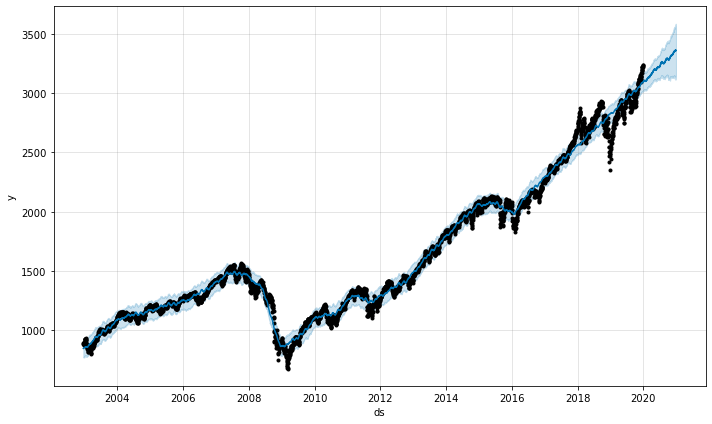

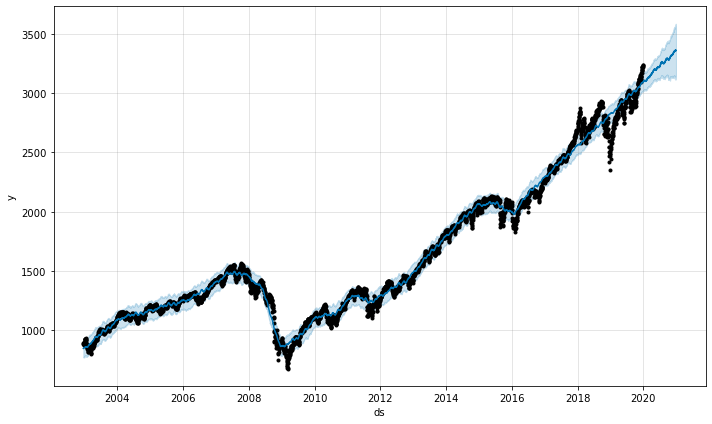

In [157]:
from fbprophet.plot import plot
# A better plot than the simple matplotlib
plot(fbp, forecast)